In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib
!pip install imutils

You should consider upgrading via the 'c:\users\21smt17\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\21smt17\anaconda3\python.exe -m pip install --upgrade pip' command.


In [1]:
#-*- coding:utf-8-*-
import imutils
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from tqdm import tqdm

In [2]:
mp_holistic = mp.solutions.holistic #Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                   # Image is no longer writeable
    results = model.process(image)                  # Make prediction
    image.flags.writeable = True                    # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # COLOR CONVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [5]:
mp_holistic.POSE_CONNECTIONS

frozenset({(<PoseLandmark.NOSE: 0>, <PoseLandmark.LEFT_EYE_INNER: 1>),
           (<PoseLandmark.NOSE: 0>, <PoseLandmark.RIGHT_EYE_INNER: 4>),
           (<PoseLandmark.LEFT_EYE_INNER: 1>, <PoseLandmark.LEFT_EYE: 2>),
           (<PoseLandmark.LEFT_EYE: 2>, <PoseLandmark.LEFT_EYE_OUTER: 3>),
           (<PoseLandmark.LEFT_EYE_OUTER: 3>, <PoseLandmark.LEFT_EAR: 7>),
           (<PoseLandmark.RIGHT_EYE_INNER: 4>, <PoseLandmark.RIGHT_EYE: 5>),
           (<PoseLandmark.RIGHT_EYE: 5>, <PoseLandmark.RIGHT_EYE_OUTER: 6>),
           (<PoseLandmark.RIGHT_EYE_OUTER: 6>, <PoseLandmark.RIGHT_EAR: 8>),
           (<PoseLandmark.MOUTH_RIGHT: 10>, <PoseLandmark.MOUTH_LEFT: 9>),
           (<PoseLandmark.LEFT_SHOULDER: 11>, <PoseLandmark.LEFT_ELBOW: 13>),
           (<PoseLandmark.LEFT_SHOULDER: 11>, <PoseLandmark.LEFT_HIP: 23>),
           (<PoseLandmark.RIGHT_SHOULDER: 12>,
            <PoseLandmark.LEFT_SHOULDER: 11>),
           (<PoseLandmark.RIGHT_SHOULDER: 12>, <PoseLandmark.RIGHT_ELBOW: 14>)

In [6]:
def draw_styled_landmarks(image, results):
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS,
#                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1,circle_radius=1),
#                              mp_drawing.DrawingSpec(color=(80,265,121), thickness=1,circle_radius=1)
#                              ) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2,circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2,circle_radius=2)) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2,circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2,circle_radius=2)) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,6), thickness=2,circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2,circle_radius=2))

In [12]:
import cv2
#cap = cv2.VideoCapture(0)
# for i in range(0,3):
#cap = cv2.VideoCapture("./img/NIA_SL_WORD2751_REAL01_F.mp4")
#cap = cv2.VideoCapture("./img/T1.mp4")
cap = cv2.VideoCapture(0)
# for i in range(0,2,1):
#     cap = cv2.VideoCapture("./img/KETI_SL_000000000"+"{}.avi".format(i + 2))
    
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
    
        # Read feed        
        ret, frame = cap.read()
        #frame = imutils.resize(frame, width=1200)
#         if not ret:
#             print("비디오 읽기 실패 / 비디오 모두 읽음")
#             cap.release()   # 비디오 읽기 종료
#             cv2.destroyAllWindows()  # 새로 연 창을 모두 닫아줌
#             break
        # Make detections(탐지들)
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)
        
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [13]:
cap.release()
cv2.destroyAllWindows()

In [14]:
#results.left_hand_landmarks.landmark
len(results.right_hand_landmarks.landmark)

21

In [15]:
print(draw_landmarks(frame, results))

None


In [16]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [17]:
#test
#pose
#len(pose)
#pose = np.array([[res.x, res.y, res.z, res.visibility(저항)] for res in results.pose_landmarks.landmark])
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)                                                                                                   # 학습시킬려고 flatten으로 쫙 펴줌
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [18]:
def extract_keypoints(results):
   pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
#    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)                                                                                                   # 학습시킬려고 flatten으로 쫙 펴줌
   lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
   rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3) 
   return np.concatenate([pose, lh, rh])

In [19]:
# len(results.face_landmarks.landmark) * 3

In [20]:
lh

array([ 7.72553742e-01,  4.82764006e-01, -5.18416891e-05,  7.22261369e-01,
        4.71668482e-01, -2.42888685e-02,  6.83698654e-01,  4.30453897e-01,
       -3.32258046e-02,  6.62606776e-01,  3.88677537e-01, -4.38125096e-02,
        6.48631215e-01,  3.59552532e-01, -5.37799485e-02,  7.14212179e-01,
        3.41192454e-01,  4.95578302e-03,  6.91749156e-01,  2.91468412e-01,
       -4.16507619e-03,  6.79816961e-01,  2.58509070e-01, -1.63817033e-02,
        6.71166539e-01,  2.29815394e-01, -2.48669069e-02,  7.43252695e-01,
        3.25180799e-01,  5.40196802e-03,  7.31994629e-01,  2.62478322e-01,
        7.40574952e-03,  7.26909876e-01,  2.21591830e-01, -6.11211499e-03,
        7.23818660e-01,  1.84903726e-01, -1.69169046e-02,  7.70717919e-01,
        3.24362069e-01,  1.18217315e-03,  7.68752098e-01,  2.63562351e-01,
       -1.65251875e-03,  7.67558694e-01,  2.23051041e-01, -1.44589227e-02,
        7.66027749e-01,  1.87587023e-01, -2.57512853e-02,  7.97989786e-01,
        3.36130917e-01, -

In [21]:
rh

array([ 3.67484421e-01,  4.72166061e-01, -1.94571148e-05,  4.13737595e-01,
        4.50693309e-01, -8.22601654e-03,  4.47822452e-01,  3.99460077e-01,
       -5.55050652e-03,  4.66614157e-01,  3.56212050e-01, -6.19359268e-03,
        4.82483238e-01,  3.31261784e-01, -7.52679398e-03,  4.12096977e-01,
        3.15232456e-01,  1.49688683e-02,  4.30908084e-01,  2.60299921e-01,
        9.29309521e-03,  4.41559225e-01,  2.26733774e-01,  3.24125448e-03,
        4.49822634e-01,  1.96389392e-01, -2.32772343e-03,  3.83237064e-01,
        3.02313894e-01,  8.09591357e-03,  3.87370020e-01,  2.36551434e-01,
        3.75996530e-03,  3.90258610e-01,  1.96011901e-01, -5.61167533e-03,
        3.92127961e-01,  1.63129315e-01, -1.13428235e-02,  3.56078297e-01,
        3.04522693e-01, -2.70230928e-03,  3.53256971e-01,  2.42216915e-01,
       -1.15499655e-02,  3.53890449e-01,  2.02621818e-01, -2.23084502e-02,
        3.55256081e-01,  1.69425488e-01, -2.99432147e-02,  3.29741597e-01,
        3.22026998e-01, -

In [22]:
np.zeros(21*3)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
#extract_keypoints(results).shape
result_test = extract_keypoints(results)

In [24]:
result_test

array([ 5.48791289e-01,  3.16651255e-01, -4.43807065e-01,  9.99502659e-01,
        5.71273685e-01,  2.53497243e-01, -4.18215364e-01,  9.99396265e-01,
        5.90462446e-01,  2.51938760e-01, -4.17661518e-01,  9.99227226e-01,
        6.09732211e-01,  2.53888577e-01, -4.17885453e-01,  9.99389768e-01,
        5.21912932e-01,  2.67842472e-01, -3.86885345e-01,  9.99280095e-01,
        5.08461833e-01,  2.73829401e-01, -3.87976229e-01,  9.99040186e-01,
        4.92022514e-01,  2.77240187e-01, -3.88287097e-01,  9.99212384e-01,
        6.26518250e-01,  2.86040336e-01, -1.64065316e-01,  9.99394596e-01,
        4.78948981e-01,  3.10236365e-01, -5.27457409e-02,  9.99365151e-01,
        5.92750251e-01,  3.86069953e-01, -3.55019659e-01,  9.99292254e-01,
        5.16966164e-01,  3.93580437e-01, -3.15013528e-01,  9.99249935e-01,
        7.59184599e-01,  5.51140726e-01, -9.42915529e-02,  9.97097313e-01,
        4.20241922e-01,  5.81682742e-01,  1.21898398e-01,  9.95751560e-01,
        9.19763923e-01,  

In [25]:
468*3+33*4+21*3+21*3

1662

In [182]:
# 딥러닝 파일에 0.npy 파일 생김   test용
np.save('0', result_test) 

In [259]:
# path for exported data, numpy arrays
DATA_PATH = os.path.join('HandSign_text')

# Actions that we try to detect
#actions = np.array(['coco','love','HM'])
#actions = np.array(['T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12'])
#actions = np.array(['감사합니다','귀여워요','괜찮아요','미안합니다','기다려요'])
actions = np.array(['함께 식사할까요','안녕하세요 만나서 반갑습니다','잘 지냈어요','오랜만이야','네 알고있습니다',
                    '감사합니다','귀여워요','괜찮아요','미안합니다','즐겁다','평화','화장실','여기','병원','배고프다'])
# Thirty videos worth of data
no_sequences =  20#60#10      #29 , 16, 5

# videos are going to be 30 frames in length
sequence_length = 50#40#50    #30, 20, 100

In [260]:
# 폴더 세개 생성!! 딥러닝 -> 안녕, 나는, 아가형민 순서대로 생김
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except :
            pass

In [261]:
cap=cv2.VideoCapture(0)    
    # Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     for action in actions:        
    # New Loop
    # Loop through actions
        

        # Loop through sequences aka videos

#    for action in actions:
        for i in range(0,20,1):        
            for frame_num in range(sequence_length):                

                # read feed
                ret, frame = cap.read()
                #frame = imutils.resize(frame, width=800)
                # Make detections
                image, results = mediapipe_detection(frame, holistic)
    #                print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)

                # New Apply wait logic
                if frame_num == 0:
                    cv2.putText(image, 'STRATING COLLECTION', (120,200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number{} f_num{}'.format('네 알고있습니다', i,frame_num), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                        # show to screen

                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000) # 1000

                else : 
                    cv2.putText(image, 'Collecting frames for {} Video Number{} f_num{}'.format('네 알고있습니다', i, frame_num), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                        # show to screen
                    cv2.imshow('OpenCV Feed', image)

                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, '네 알고있습니다', str(i), str(frame_num))
                np.save(npy_path, keypoints)
                #count = count+1
    #                # 중간에 파일이 없어도 끊기지 않게
    #                for i in range(0,sequence_length):
    #                    if os.path.isfile('C:/Users/21SMT37/3차 프젝/MP_Data/3차/8/{}.npy'.format(i)):
    #                        pass
    #                    else : 
    #                        continue

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
#         cap.release()
#         cv2.destroyAllWindows()
cap.release()
cv2.destroyAllWindows()

In [262]:
cap.release()
cv2.destroyAllWindows()

In [263]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [264]:
from PIL import ImageFont, ImageDraw, Image

In [265]:
label_map = {label:num for num, label in enumerate(actions)}

In [266]:
label_map

{'함께 식사할까요': 0,
 '안녕하세요 만나서 반갑습니다': 1,
 '잘 지냈어요': 2,
 '오랜만이야': 3,
 '네 알고있습니다': 4,
 '감사합니다': 5,
 '귀여워요': 6,
 '괜찮아요': 7,
 '미안합니다': 8,
 '즐겁다': 9,
 '평화': 10,
 '화장실': 11,
 '여기': 12,
 '병원': 13,
 '배고프다': 14}

In [267]:
frame_num

49

In [268]:
sequences, labels = [], []
for action in actions :
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [269]:
X = np.array(sequences)

In [270]:
y = to_categorical(labels).astype(int)

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2)

In [272]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN, Dropout, TimeDistributed, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [273]:
log_dir = os.path.join("Hand_plustext")
tb_callback = TensorBoard(log_dir=log_dir)

In [274]:
X.shape

(300, 50, 258)

In [275]:
md = Sequential()
md.add(LSTM(128, return_sequences=True, activation='tanh', input_shape=(50,258)))
md.add(LSTM(64, return_sequences=True, activation='tanh'))
md.add(LSTM(32, return_sequences=False, activation='tanh'))
md.add(Dense(64, activation='tanh'))
md.add(Dense(32, activation='tanh'))
md.add(Dense(actions.shape[0], activation='softmax'))

In [276]:
X_train.shape, y_train.shape

((240, 50, 258), (240, 15))

In [277]:
#Adam(lr=0.0001)    #categorical_crossentropy : 이진 교차 엔트로피
md.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy',
           metrics=['categorical_accuracy']) # categorical_accuracy

In [278]:
h = md.fit(X_train, y_train, batch_size=128,
         epochs = 400, callbacks=[tb_callback]) # tensorboard_callback

Epoch 1/400
2/2 [==============================] - 3s 652ms/step - loss: 2.7374 - categorical_accuracy: 0.0651
Epoch 2/400
2/2 [==============================] - 0s 148ms/step - loss: 2.7102 - categorical_accuracy: 0.0573
Epoch 3/400
2/2 [==============================] - 0s 136ms/step - loss: 2.6913 - categorical_accuracy: 0.1113
Epoch 4/400
2/2 [==============================] - 0s 144ms/step - loss: 2.6704 - categorical_accuracy: 0.1245
Epoch 5/400
2/2 [==============================] - 0s 142ms/step - loss: 2.6583 - categorical_accuracy: 0.2014
Epoch 6/400
2/2 [==============================] - 0s 149ms/step - loss: 2.6425 - categorical_accuracy: 0.2099
Epoch 7/400
2/2 [==============================] - 0s 140ms/step - loss: 2.6200 - categorical_accuracy: 0.2413
Epoch 8/400
2/2 [==============================] - 0s 148ms/step - loss: 2.6005 - categorical_accuracy: 0.2174
Epoch 9/400
2/2 [==============================] - 0s 139ms/step - loss: 2.5877 - categorical_accuracy: 0.2047
E

2/2 [==============================] - 0s 147ms/step - loss: 0.8326 - categorical_accuracy: 1.0000
Epoch 75/400
2/2 [==============================] - 0s 152ms/step - loss: 0.8132 - categorical_accuracy: 1.0000
Epoch 76/400
2/2 [==============================] - 0s 157ms/step - loss: 0.8047 - categorical_accuracy: 1.0000
Epoch 77/400
2/2 [==============================] - 0s 159ms/step - loss: 0.7933 - categorical_accuracy: 1.0000
Epoch 78/400
2/2 [==============================] - 0s 152ms/step - loss: 0.7803 - categorical_accuracy: 1.0000
Epoch 79/400
2/2 [==============================] - 0s 146ms/step - loss: 0.7684 - categorical_accuracy: 1.0000
Epoch 80/400
2/2 [==============================] - 0s 142ms/step - loss: 0.7536 - categorical_accuracy: 1.0000
Epoch 81/400
2/2 [==============================] - 0s 144ms/step - loss: 0.7482 - categorical_accuracy: 1.0000
Epoch 82/400
2/2 [==============================] - 0s 146ms/step - loss: 0.7348 - categorical_accuracy: 1.0000
Epoch

2/2 [==============================] - 0s 155ms/step - loss: 0.4725 - categorical_accuracy: 0.9783
Epoch 147/400
2/2 [==============================] - 0s 158ms/step - loss: 0.4827 - categorical_accuracy: 0.9540
Epoch 148/400
2/2 [==============================] - 0s 147ms/step - loss: 0.4067 - categorical_accuracy: 0.9892
Epoch 149/400
2/2 [==============================] - 0s 148ms/step - loss: 0.3848 - categorical_accuracy: 0.9946
Epoch 150/400
2/2 [==============================] - 0s 144ms/step - loss: 0.3798 - categorical_accuracy: 0.9972
Epoch 151/400
2/2 [==============================] - 0s 151ms/step - loss: 0.3635 - categorical_accuracy: 1.0000
Epoch 152/400
2/2 [==============================] - 0s 146ms/step - loss: 0.3532 - categorical_accuracy: 1.0000
Epoch 153/400
2/2 [==============================] - 0s 151ms/step - loss: 0.3440 - categorical_accuracy: 1.0000
Epoch 154/400
2/2 [==============================] - 0s 147ms/step - loss: 0.3357 - categorical_accuracy: 1.00

2/2 [==============================] - 0s 151ms/step - loss: 0.1922 - categorical_accuracy: 1.0000
Epoch 219/400
2/2 [==============================] - 0s 147ms/step - loss: 0.1951 - categorical_accuracy: 1.0000
Epoch 220/400
2/2 [==============================] - 0s 145ms/step - loss: 0.1926 - categorical_accuracy: 1.0000
Epoch 221/400
2/2 [==============================] - 0s 153ms/step - loss: 0.1880 - categorical_accuracy: 1.0000
Epoch 222/400
2/2 [==============================] - 0s 146ms/step - loss: 0.1914 - categorical_accuracy: 1.0000
Epoch 223/400
2/2 [==============================] - 0s 148ms/step - loss: 0.1911 - categorical_accuracy: 1.0000
Epoch 224/400
2/2 [==============================] - 0s 150ms/step - loss: 0.1905 - categorical_accuracy: 1.0000
Epoch 225/400
2/2 [==============================] - 0s 149ms/step - loss: 0.1872 - categorical_accuracy: 1.0000
Epoch 226/400
2/2 [==============================] - 0s 148ms/step - loss: 0.1861 - categorical_accuracy: 1.00

2/2 [==============================] - 0s 151ms/step - loss: 0.1274 - categorical_accuracy: 1.0000
Epoch 291/400
2/2 [==============================] - 0s 146ms/step - loss: 0.1281 - categorical_accuracy: 1.0000
Epoch 292/400
2/2 [==============================] - 0s 151ms/step - loss: 0.1262 - categorical_accuracy: 1.0000
Epoch 293/400
2/2 [==============================] - 0s 148ms/step - loss: 0.1277 - categorical_accuracy: 1.0000
Epoch 294/400
2/2 [==============================] - 0s 152ms/step - loss: 0.1251 - categorical_accuracy: 1.0000
Epoch 295/400
2/2 [==============================] - 0s 147ms/step - loss: 0.1249 - categorical_accuracy: 1.0000
Epoch 296/400
2/2 [==============================] - 0s 152ms/step - loss: 0.1249 - categorical_accuracy: 1.0000
Epoch 297/400
2/2 [==============================] - 0s 147ms/step - loss: 0.1238 - categorical_accuracy: 1.0000
Epoch 298/400
2/2 [==============================] - 0s 149ms/step - loss: 0.1209 - categorical_accuracy: 1.00

2/2 [==============================] - 0s 147ms/step - loss: 0.0935 - categorical_accuracy: 1.0000
Epoch 363/400
2/2 [==============================] - 0s 145ms/step - loss: 0.0921 - categorical_accuracy: 1.0000
Epoch 364/400
2/2 [==============================] - 0s 145ms/step - loss: 0.0907 - categorical_accuracy: 1.0000
Epoch 365/400
2/2 [==============================] - 0s 146ms/step - loss: 0.0915 - categorical_accuracy: 1.0000
Epoch 366/400
2/2 [==============================] - 0s 150ms/step - loss: 0.0908 - categorical_accuracy: 1.0000
Epoch 367/400
2/2 [==============================] - 0s 148ms/step - loss: 0.0895 - categorical_accuracy: 1.0000
Epoch 368/400
2/2 [==============================] - 0s 149ms/step - loss: 0.0897 - categorical_accuracy: 1.0000
Epoch 369/400
2/2 [==============================] - 0s 148ms/step - loss: 0.0899 - categorical_accuracy: 1.0000
Epoch 370/400
2/2 [==============================] - 0s 148ms/step - loss: 0.0886 - categorical_accuracy: 1.00

In [279]:
md.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 50, 128)           198144    
_________________________________________________________________
lstm_13 (LSTM)               (None, 50, 64)            49408     
_________________________________________________________________
lstm_14 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 15)                495       
Total params: 264,655
Trainable params: 264,655
Non-trainable params: 0
________________________________________________

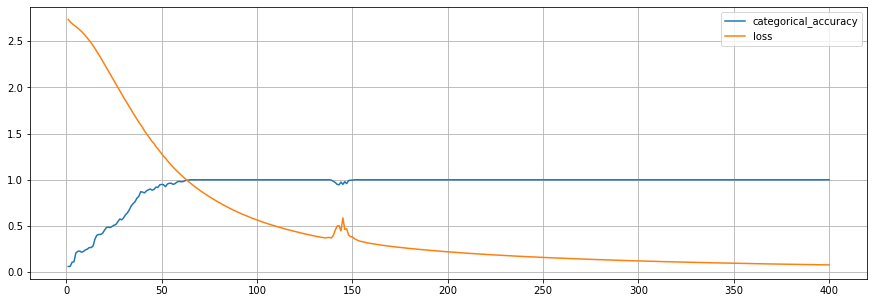

In [280]:
# 시각화
plt.figure(figsize=(15, 5))

plt.plot(range(1, 401, 1),
         h.history['categorical_accuracy'],
         label='categorical_accuracy'
         )

plt.plot(range(1, 401, 1),
         h.history['loss'],
         label='loss'
         )
plt.grid()
plt.legend()
plt.show()

In [281]:
res = md.predict(X_test)

In [283]:
for i in range(0,len(actions)):
    actions[np.argmax(res[i])]
    actions[np.argmax(y_test[i])]
    print(actions[np.argmax(res[i])])
    print(actions[np.argmax(y_test[i])])
    print("==============================")

함께 식사할까요
함께 식사할까요
미안합니다
미안합니다
안녕하세요 만나서 반갑습니다
안녕하세요 만나서 반갑습니다
감사합니다
감사합니다
평화
평화
즐겁다
배고프다
잘 지냈어요
잘 지냈어요
화장실
화장실
함께 식사할까요
함께 식사할까요
잘 지냈어요
잘 지냈어요
귀여워요
귀여워요
함께 식사할까요
함께 식사할까요
즐겁다
즐겁다
즐겁다
즐겁다
잘 지냈어요
잘 지냈어요


In [284]:
# len(actions)

In [285]:
# actions[np.argmax(res[4])]

In [286]:
# actions[np.argmax(y_test[8])]

In [287]:
md.save('HandSign_plus_text.h5')  # 모델 저장

In [288]:
#md.load_weights('HandSign1_word.h5')  # 모델 저장

In [289]:
# 모델 재평가
#loss,acc = md.evaluate(test_images,  test_labels, verbose=2)
#print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

In [290]:
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score 

In [291]:
yhat = md.predict(X_train)

In [292]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [293]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[224,   0],
        [  0,  16]],

       [[224,   0],
        [  0,  16]],

       [[224,   0],
        [  0,  16]],

       [[224,   0],
        [  0,  16]],

       [[222,   0],
        [  0,  18]],

       [[224,   0],
        [  0,  16]],

       [[224,   0],
        [  0,  16]],

       [[226,   0],
        [  0,  14]],

       [[223,   0],
        [  0,  17]],

       [[226,   0],
        [  0,  14]],

       [[223,   0],
        [  0,  17]],

       [[226,   0],
        [  0,  14]],

       [[222,   0],
        [  0,  18]],

       [[222,   0],
        [  0,  18]],

       [[226,   0],
        [  0,  14]]], dtype=int64)

In [294]:
accuracy_score(ytrue, yhat)

1.0

In [295]:
md.evaluate(X_test, y_test)

2/2 [==============================] - 1s 20ms/step - loss: 0.2344 - categorical_accuracy: 0.9667


[0.2344253808259964, 0.9666666388511658]

In [296]:
# colors = [(245,117,16),(117,245,16),(16,117,245),(245,117,16),(117,245,16),(16,117,245),(245,117,16),(117,245,16),
#           (16,117,245),(245,117,16)]
# #colors = [(245,117,16),(117,245,16),(16,117,245),(245,117,16),(117,245,16)]
# # ,(245,117,16),(117,245,16),(16,117,245),(245,117,16)
# #          ,(117,245,16),(16,117,245),(245,117,16),(117,245,16),(16,117,245)
# def prob_viz(res,actions,input_frame,colors):
#     output_frame = input_frame.copy()
#     for num, prob in enumerate(res):
#         cv2.rectangle(output_frame, (0,60+num*40),(int(prob*100),90+num*40),colors[num],-1)
#         cv2.putText(output_frame, actions[num],(0,85+num*40),cv2.FONT_HERSHEY_SIMPLEX,1,
#                     (255,255,255),2,cv2.LINE_AA)
        
#     return output_frame

In [297]:
# # -*- coding : utf-8 -*-
# import sys
# print(sys.getdefaultencoding())

In [413]:
# -*- coding : utf-8 -*-
import cv2
from PIL import ImageFont, ImageDraw, Image  # 한글 출력 임포트
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.7
predictions = []

def most_frequent(data):
    return max(data, key=data.count)
cnt = 0
result_actions = 0

#word=['감사합니다','귀여워요','괜찮아요','미안합니다','기다려요']
b,g,r,a = 0,0,0,10
# fontpath = "fonts/gulim.ttc"
fontpath = "fonts/H2MKPB.TTF"
font = ImageFont.truetype(fontpath, 50)

cap = cv2.VideoCapture("./img/Ntm.mp4")
#cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:   
    while cap.isOpened():
    
        # read feed
        
        ret, frame = cap.read()
        if not ret:
            #print("비디오 읽기 실패 / 비디오 모두 읽음")
            print("Finish")
            cap.release()   # 비디오 읽기 종료
            cv2.destroyAllWindows()  # 새로 연 창을 모두 닫아줌
            break
        
        frame = imutils.resize(frame, width=800)
            
        # Make detections
        image, results = mediapipe_detection(frame,holistic)
#         print(results)
        
#        image = Image.fromarray(image)
#        draw = ImageDraw.Draw(image)
#        draw.text(xy=(10,15), text=actions[np.argmax(res)], font=font, fill=(255,255,255))
        image=np.array(image)
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        img_pil = Image.fromarray(image)
        draw = ImageDraw.Draw(img_pil)
        
        #2. Prediction logic
        keypoints = extract_keypoints(results)
#        sequence.insert(0,keypoints)
#        sequence = sequence[:30]
        sequence.append(keypoints)
#        sequence = sequence[-40:]
        
#        label = actions[np.argmax(res)]
        if len(sequence) == 50 :  # 30 프레임 
                 #np.expand_dims : (s_num,50,1662)을 캡슐화
            res = md.predict(np.expand_dims(sequence, axis=0))[0]            
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            sequence = []
        
# # # #         # 3. Viz logic
#         if np.unique(predictions[:10]) ==np.argmax(res): 
        
#         if res[np.argmax(res)] > threshold: # 정확도                
#             if len(sentence) > 0:
#                 if actions[np.argmax(res)] != sentence[-1]:
#                     sentence.append(actions[np.argmax(res)])
# #                     print(actions[np.argmax(res)])
#             else :                               
#                 sentence.append(actions[np.argmax(res)])

#         if len(sentence) > 2 : #화면출력 글자 수
#             sentence = sentence[-2:]
#                 #draw.text(xy=(10,15), text=sentence, font=font, fill=(255,255,255))
#              # VIz probabilities
# #        image = prob_viz(res, actions, image, colors)
#               draw.text(xy=(10,15), text=actions[np.argmax(res)], font=font, fill=(255,255,255))

#         cv2.rectangle(image, (0,0), (640,40), (245, 117, 16), -1)
#         if sentence != [] :                        
#             cv2.putText(image, sentence, (3,30),
#                         cv2.FONT_HERSHEY_SIMPLEX,1, (255,255,255), 2, cv2.LINE_AA)
            
#         if result_actions == label:            
#             cnt += 1
# #         elif result_actions != label:
# #             cnt = 0
        
#         result_actions = "귀여워요"
#         if cnt >= 15:
#             #print(result_actions)
        draw.text((10, 10), actions[np.argmax(res)] , font=font, fill=(b,g,r,a))
        image = np.array(img_pil)
            
        
        # show to screen
        cv2.imshow('OpenCV Feed', image)
        
        # Break gracefully
        if cv2.waitKey(10) == 27:
            cap.release()
            cv2.destroyAllWindows()
            break
            
        
    #print(actions[np.argmax(res)])
#     def most_frequent(data):
#         count_list=[]

#         for x in data: 
#             count_list.append(data.count(x))
 
#         return data[count_list.index(max(count_list))]

#     print(most_frequent(sequence))
    print(actions[np.argmax(res)])
#     cap.release()
#     cv2.destroyAllWindows()
#     print(most_frequent(sentence))

안녕하세요 만나서 반갑습니다
안녕하세요 만나서 반갑습니다
Finish
안녕하세요 만나서 반갑습니다


In [388]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
from flask import Flask
from flask import redirect

app = Flask(__name__) 

@app.route('/')
def index():     
    # JSP로 만들어진 웹 페이지에 데이터 전송
    # GET방식으로 데이터 전달 시 쿼리스트링 기술 활용
    #  -> ?name=value&name=value&...
    url = 'http://localhost:8081/muscle/index.do?data='+actions[np.argmax(res)]
    return redirect(url)

if __name__ == '__main__':
    app.run(host='127.0.0.1', port='5001') 

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5001/ (Press CTRL+C to quit)
127.0.0.1 - - [13/Aug/2021 15:04:19] "GET / HTTP/1.1" 302 -
127.0.0.1 - - [13/Aug/2021 15:12:00] "GET / HTTP/1.1" 302 -
127.0.0.1 - - [13/Aug/2021 15:13:00] "GET / HTTP/1.1" 302 -


In [ ]:
# # 1. New detection variables
# sequence = []
# sentence = []
# predictions=[]
# threshold = 0.6

# # cap = cv2.VideoCapture(0)
# # cap = cv2.VideoCapture("D:\\aihub\\수어 영상\\1.Training\\[원천]01_real_word_video\\01\\NIA_SL_WORD1504_REAL01_F.mp4")
# # cap = cv2.VideoCapture("C:\\Users\\21SMT41\\Desktop\\deep_ex\\eeee\\NIA_SL_WORD1505_REAL01_R.mp4")
# cap = cv2.VideoCapture("C:\\Users\\21SMT41\\Desktop\\web_video\\cocohappy.mp4")

# cv2.waitKey(3000)
# # Set mediapipe model
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:   
#     while cap.isOpened():
        
#         # read feed
        
#         ret, frame = cap.read()
#         if not ret:
#             print("비디오 읽기 실패 / 비디오 모두 읽음")
#             cap.release()   # 비디오 읽기 종료
#             cv2.destroyAllWindows()  # 새로 연 창을 모두 닫아줌
#             break
            
#         # Make detections
#         image, results = mediapipe_detection(frame,holistic)
# #         print(results)
        
#         # Draw landmarks
#         draw_styled_landmarks(image, results)
        
#         #2. Prediction logic
#         keypoints = extract_keypoints(results)
# #         sequence.insert(0,keypoints)
# #        sequence = sequence[:30]
#         sequence.append(keypoints)
# #         sequence = sequence[-50:]
        
#         if len(sequence) == 100 :
#             res = model.predict(np.expand_dims(sequence, axis=0))[0]
#             print(actions[np.argmax(res)])
#             sentence = actions[np.argmax(res)]
#             sequence=[]
# #             predictions.append(np.argmax(res))
           
           
#         # 3. Viz logic
# #         if np.unique(predictions[-10:])==np.argmax(res):
          
        
# #         if res[np.argmax(res)] > threshold:
# #             if len(sentence) > 0:
# #                 if actions[np.argmax(res)] != sentence[-1]:
# #                     sentence.append(actions[np.argmax(res)])
# #             else : 
# #                 sentence.append(actions[np.argmax(res)])
            
# #         if len(sentence) >3 :
# #             sentence = sentence[-3:]
               
# #         # VIz probabilities
# #         image = prob_viz(res, actions, image, colors)
#         cv2.rectangle(image, (0,0), (640,40), (245, 117, 16), -1)
#         if sentence != [] :
            
#             cv2.putText(image, sentence, (3,30),
#                       cv2.FONT_HERSHEY_SIMPLEX,1, (255,255,255), 2, cv2.LINE_AA)
                 
        
# #         

#         # show to screen
#         cv2.imshow('OpenCV Feed', image)
        
#         # Break gracefully
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break
#     cap.release()
#     cv2.destroyAllWindows()
# # print(sentence)

In [134]:
# # -*- coding : utf-8 -*-
# import cv2
# from PIL import ImageFont, ImageDraw, Image  # 한글 출력 임포트
# # 1. New detection variables
# sequence = []
# sentence = []
# threshold = 0.7
# predictions = []

# def most_frequent(data):
#     return max(data, key=data.count)
# cnt = 0
# result_actions = 0

# word=['감사합니다','귀여워요','괜찮아요','미안합니다','기다려요']
# b,g,r,a = 0,0,0,10
# fontpath = "fonts/gulim.ttc"
# font = ImageFont.truetype(fontpath, 40)

# cap = cv2.VideoCapture("./img/A2.mp4")
# #cap = cv2.VideoCapture(0)
# # Set mediapipe model
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:   
#     while cap.isOpened():
    
#         # read feed
        
#         ret, frame = cap.read()
#         frame = imutils.resize(frame, width=800)
#         if not ret:
#             #print("비디오 읽기 실패 / 비디오 모두 읽음")
#             print("Finish")
#             cap.release()   # 비디오 읽기 종료
#             cv2.destroyAllWindows()  # 새로 연 창을 모두 닫아줌
#             break
            
#         # Make detections
#         image, results = mediapipe_detection(frame,holistic)
#         print(results)
        
# #         image = Image.fromarray(image)
# #         draw = ImageDraw.Draw(image)
# #         draw.text(xy=(10,15), text=actions[np.argmax(res)], font=font, fill=(255,255,255))
# #         image=np.array(image)
#         # Draw landmarks
#         draw_styled_landmarks(image, results)
        
#         img_pil = Image.fromarray(image)
#         draw = ImageDraw.Draw(img_pil)
#         #label = actions[np.argmax(res)]
        
#         #2. Prediction logic
#         keypoints = extract_keypoints(results)
# #        sequence.insert(0,keypoints)
# #        sequence = sequence[:30]
#         sequence.append(keypoints)
# #        sequence = sequence[-100:]
        
        
#         if len(sequence) == 100 :  # 30 프레임 
#                  #np.expand_dims : (s_num,50,1662)을 캡슐화
#             res = md.predict(np.expand_dims(sequence, axis=0))[0]            
#             print(actions[np.argmax(res)])
#             predictions.append(np.argmax(res))
        
# # # #         # 3. Viz logic
# #        if np.unique(predictions[:10]) ==np.argmax(res): 
        
# #         if res[np.argmax(res)] > threshold: # 정확도                
# #             if len(sentence) > 0:
# #                 if actions[np.argmax(res)] != sentence[-1]:
# #                     sentence.append(actions[np.argmax(res)])
# #                     print(actions[np.argmax(res)])
# #             else :                               
# #                 sentence.append(actions[np.argmax(res)])

# #         if len(sentence) > 2 : #화면출력 글자 수
# #             sentence = sentence[-2:]
# #                 #draw.text(xy=(10,15), text=sentence, font=font, fill=(255,255,255))
# #     #         # VIz probabilities
# # #        image = prob_viz(res, actions, image, colors)
# #     #         draw.text(xy=(10,15), text=actions[np.argmax(res)], font=font, fill=(255,255,255))  
#         cv2.rectangle(image, (0,0), (640,40), (245, 117, 16), -1)
# #         cv2.putText(image, ' '.join(sentence), (3,30),
# #                     cv2.FONT_HERSHEY_SIMPLEX,1, (255,255,255), 2, cv2.LINE_AA)
# #         if result_actions == label:            
# #             cnt += 1
# # #         elif result_actions != label:
# # #             cnt = 0
        
# #         result_actions = "귀여워요"
# #         if cnt >= 15:
# #             #print(result_actions)
# #             draw.text((10, 10), actions[np.argmax(res)] , font=font, fill=(b,g,r,a))
# #             image = np.array(img_pil)
            
        
#         # show to screen
#         cv2.imshow('OpenCV Feed', image)
        
#         # Break gracefully
#         if cv2.waitKey(10) == 27:
#             break
            
        
#     #print(actions[np.argmax(res)])
# #     def most_frequent(data):
# #         count_list=[]

# #         for x in data: 
# #             count_list.append(data.count(x))
 
# #         return data[count_list.index(max(count_list))]

# #     print(most_frequent(sequence))
#     cap.release()
#     cv2.destroyAllWindows()
# #    print(most_frequent(sentence))

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [132]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
actions[np.argmax(res)]

In [ ]:
md.predict(np.expand_dims(sequence, axis=0)[0])

In [ ]:
np.expand_dims(sequence, axis=0)[0]

In [ ]:
# from flask import Flask
# from flask import request, redirect

# app = Flask(__name__) 

# @app.route('/', methods=['GET','POST']) #/wondu
# def index():   #wondu  
       
#     if request.method == 'GET':
# #         cf1 = str(request.args['chk_info1'])
# #         cf2 = str(request.args['chk_info2'])
# #         cf3 = int(request.args['chk_info3'])
       
#         #df.iloc[list(similar_indexes)].sort_values('랭킹', ascending=True)[:top_n]
# #         similar_wondu = find_sim_wondu(wondu, wondu_sim_sorted_ind, cf1,cf2,cf3,3) # 견과류향, 시티로스팅 , 바디감(2)에 가까운걸 5개뽑아줘!!
# #         coffee=similar_wondu['원두이름']
# #         print(cf1, cf2, cf3)

#         # result = model() = request.args['num1']
        
        
#     else:
# #         cf1 = str(request.form['chk_info1'])
# #         cf2 = str(request.form['chk_info2'])
# #         cf3 = int(request.form['chk_info3'])
# #         print(cf1, cf2, cf3)
#         #df.iloc[list(similar_indexes)].sort_values('랭킹', ascending=True)[:top_n]
# #         similar_wondu = find_sim_wondu(wondu, wondu_sim_sorted_ind, cf1,cf2,cf3,3) # 견과류향, 시티로스팅 , 바디감(2)에 가까운걸 5개뽑아줘!!
# #         coffee=similar_wondu['원두이름']
#         #similar_wondu = find_sim_wondu(wondu, wondu_sim_sorted_ind, 'cf1','cf2',cf3,1) # 견과류향, 시티로스팅 , 바디감(2)에 가까운걸 5개뽑아줘!!
#         #coffee=similar_wondu[['원두이름']]
#      print('기모링')  
#     #print(len(coffee.values))
#     url = 'http://localhost:8081/muscle/musclevideo.do?result='+ #coffee.values[0]
#     return redirect(url)

# if __name__ == '__main__':
#     app.config['JSON_AS_ASCII'] = False
#     app.run(host='127.0.0.1', port='5002') 